In [18]:
label = []
for i in df.columns:
    for j in df.columns:
        label.append('%s->%s' %(i,j))

In [35]:
import pandas as pd
import numpy as np
import os
all_df = pd.DataFrame()
for i in np.sort(os.listdir('datasets/fevd_rtn/')):
    if '.csv' in i:
        df = pd.read_csv('datasets/fevd_rtn/%s' %i, index_col=0)
        date = i.split('.csv')[0]
        df2 = pd.DataFrame(df.values.ravel(),
                            index=label,
                            columns=[date])
        all_df = pd.concat([all_df, df2], axis=1)


In [37]:
all_df = all_df.T
all_df.index = pd.to_datetime(all_df.index)

In [42]:
all_df.to_csv('datasets/shuhai.csv')

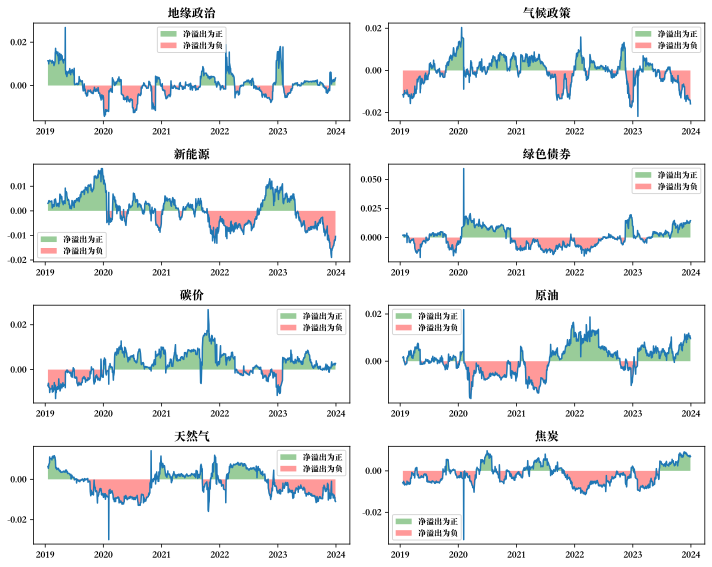

In [47]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg') 
plt.rcParams['font.sans-serif'] = 'Songti SC'  # 设置字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号“-”显示异常

fig, axes = plt.subplots(4, 2, figsize=(10, 8))
ax = axes.ravel()
ax_num = 0
for i in df.columns:
    #print(i)
    receive_df, send_df = pd.DataFrame(), pd.DataFrame()
    for j in all_df.columns:
        if '->%s' %i in j and '%s->%s' %(i,i) not in j:   # receive
            send_df = pd.concat([send_df, all_df[j]], axis=1)
        elif '%s->' %i in j and '%s->%s' %(i,i) not in j:  # send
            receive_df = pd.concat([receive_df, all_df[j]], axis=1)
    #receive_df.mean(axis=1).plot()
    #send_df.mean(axis=1).plot()
    x = receive_df.index
    y = send_df.mean(axis=1).abs() - receive_df.mean(axis=1).abs()
    ax[ax_num].plot(x, y)
    ax[ax_num].fill_between(x, y, 0, where=(y > 0), facecolor='green', alpha=0.4, interpolate=True, label='净溢出为正')
    ax[ax_num].fill_between(x, y, 0, where=(y <= 0), facecolor='red', alpha=0.4, interpolate=True, label='净溢出为负')
    ax[ax_num].legend(fontsize=8)
    ax[ax_num].set_title(i)
    ax_num += 1
plt.tight_layout()
plt.savefig('images/shuhuai.png', dpi=300)